In [10]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider(group='open')
backend = Aer.get_backend('statevector_simulator')

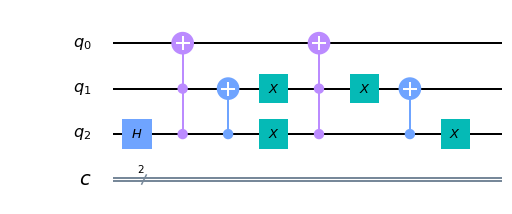

In [12]:
#krok 1
circ3 = QuantumCircuit(3,2)
circ3.h(2)

#inkrementacja
circ3.ccx(2,1,0)
circ3.cx(2,1)

#dekrementacja
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)

circ3.draw()

[0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


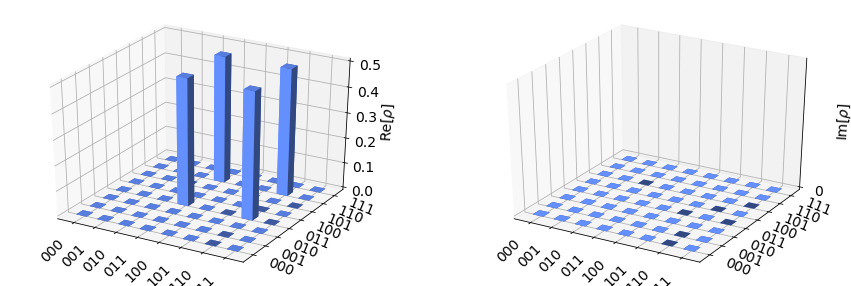

In [13]:
job = execute(circ3, backend, shots=1000)
result = job.result()
counts = result.get_counts()
outputstate = result.get_statevector(circ3)
print(outputstate)
plot_state_city(outputstate) 

Poniższe uwagi mają zastosowanie dla wniosków z każdego kroku:
- rejestr q2, przy wykorzystaniu bramki Hadamarda jest monetą
- qubit monety to qubit z indexem 2 czyli ostatni w rejestrze 3 cyfrowym

Prawdopodobieństwo (0.70710678) ^ 2 = 0.5 otrzymaliśmy dla stanów 110 oraz 011. Po odrzuceniu monety, prawdopodobieństwo 0.5 jest równe dla stanów 01 oraz 11.
Wynik zgadza się z obliczeniami.

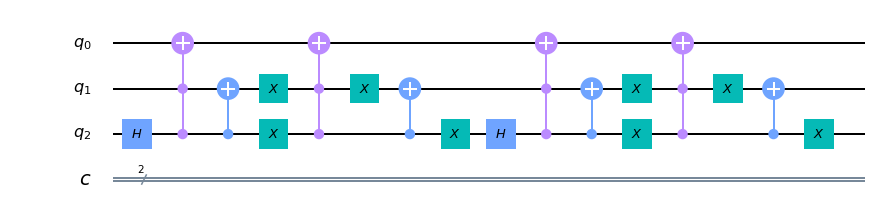

In [5]:
# Krok 2
circ4 = QuantumCircuit(3,2)
circ4.h(2)

#inkrementacja
circ4.ccx(2,1,0)
circ4.cx(2,1)

#dekrementacja
circ4.x(1)
circ4.x(2)
circ4.ccx(2,1,0)
circ4.x(1)
circ4.cx(2,1)
circ4.x(2)

circ4.h(2)

#inkrementacja
circ4.ccx(2,1,0)
circ4.cx(2,1)

#dekrementacja
circ4.x(1)
circ4.x(2)
circ4.ccx(2,1,0)
circ4.x(1)
circ4.cx(2,1)
circ4.x(2)

circ4.draw()

In [9]:
job = execute(circ4, backend)
result = job.result()
counts = result.get_counts()
outputstate = result.get_statevector(circ4, decimals = 3)
print(outputstate)

[ 0.5-0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]


Prawdopodobieństwo (0.5)^2 = 0.25 otrzymaliśmy dla stanów 100, 001, 000 oraz 101. 
Po odrzuceniu monety otrzymujemy prawdopodobienstwo P(10) = 0.25 + 0.25 = 0.5
oraz P(00) = 0.25 + 0.25 = 0.5 
Wynik zgadza się z obliczeniami.

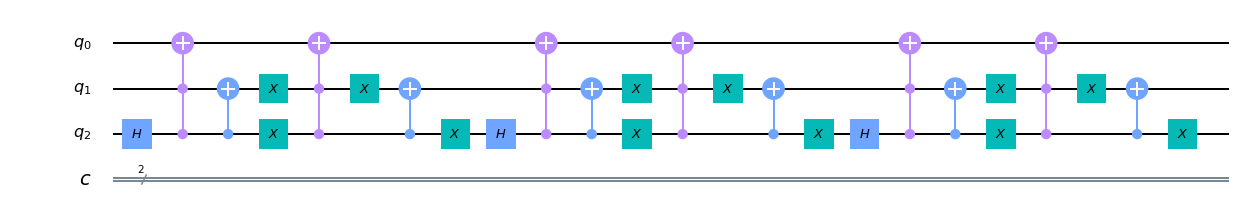

In [7]:
# Krok 3
circ5 = QuantumCircuit(3,2)
circ5.h(2)

#inkrementacja
circ5.ccx(2,1,0)
circ5.cx(2,1)

#dekrementacja
circ5.x(1)
circ5.x(2)
circ5.ccx(2,1,0)
circ5.x(1)
circ5.cx(2,1)
circ5.x(2)

circ5.h(2)

#inkrementacja
circ5.ccx(2,1,0)
circ5.cx(2,1)

#dekrementacja
circ5.x(1)
circ5.x(2)
circ5.ccx(2,1,0)
circ5.x(1)
circ5.cx(2,1)
circ5.x(2)

circ5.h(2)

#inkrementacja
circ5.ccx(2,1,0)
circ5.cx(2,1)

#dekrementacja
circ5.x(1)
circ5.x(2)
circ5.ccx(2,1,0)
circ5.x(1)
circ5.cx(2,1)
circ5.x(2)

circ5.draw()

[ 0.   +0.j  0.   +0.j  0.   +0.j  0.707-0.j  0.   +0.j  0.   +0.j
 -0.   +0.j  0.707-0.j]


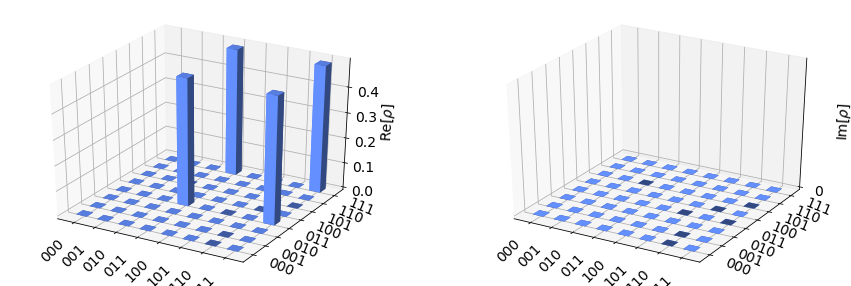

In [8]:
job = execute(circ5, backend)
result = job.result()
counts = result.get_counts()
outputstate = result.get_statevector(circ5, decimals = 3)
print(outputstate)
plot_state_city(outputstate)
#qubit q2, przy wykorzystaniu bramki Hadamarda jest monetą
#0.7 ^ 2 = 0.5

Prawdopodobieństwo (0.707)^2 = 0.5 mamy dla stanów 110 oraz 111. Po odrzuceniu monety mamy 
P(11) = 0.5 + 0.5 = 1.
Wynik zgadza się z obliczeniami.